In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
from gensim.models import Word2Vec #word2vec
from sklearn.model_selection import train_test_split #untuk split data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #untuk akurasi
from __future__ import division, print_function
import nltk
from gensim import models

In [7]:
data = pd.read_excel(r"C:\Users\user\Downloads\ASPEK.xlsx") #variable data berisikan data pubg
data #menampilkan data

,opini,aspek
0,bug tolong baik,0
1,update,0
2,pubg banned akun bukti sesal buat sangkut apak...,0
3,mantap gamenya bagus,1
4,game anjing gue sudah download habis mb main t...,0
...,...,...
2981,bug micbug stepbug suara mobil jelasping turun...,1
2982,tolong developer baik game alami bug gabisa am...,1
2983,kesini bug ngerugiin player sekali pas jalan g...,1
2984,masalah besar simpan data butuh versi gb masuk...,3


In [8]:
# Bagi dataset menjadi data latih dan data uji
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
# Ambil kolom teks dan kelas
train_texts = train_data['opini'].tolist()
train_labels = train_data['aspek'].tolist()
test_texts = test_data['opini'].tolist()
test_labels = test_data['aspek'].tolist()

word2vec

In [12]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
# Inisialisasi model Word2Vec
w2v_model = Word2Vec(train_texts, vector_size=100, min_count=1)

In [15]:
# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [16]:
# Padding teks ke panjang maksimum
max_seq_length = max(len(seq) for seq in train_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data = pad_sequences(test_sequences, maxlen=max_seq_length)

membangun model CNN

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [19]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 100)           357800    
                                                                 
 conv1d (Conv1D)             (None, 51, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 438,956
Trainable params: 438,956
Non-trainable params: 0
__________________________________________________

Pelatihan dan Evaluasi Model:

In [24]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

In [25]:
# Mengacak data latih
train_data, train_labels = shuffle(train_data, train_labels)

In [26]:
# Mengubah label ke dalam bentuk one-hot encoding
num_classes = 4
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [27]:
# Pelatihan model
batch_size = 64
epochs = 10

In [28]:
model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_labels))

Epoch 1/10
38/38 [==============================] - 4s 56ms/step - loss: 1.0664 - accuracy: 0.5762 - val_loss: 0.8461 - val_accuracy: 0.6739
Epoch 2/10
38/38 [==============================] - 2s 45ms/step - loss: 0.6534 - accuracy: 0.7613 - val_loss: 0.5404 - val_accuracy: 0.8227
Epoch 3/10
38/38 [==============================] - 2s 44ms/step - loss: 0.3807 - accuracy: 0.8773 - val_loss: 0.4764 - val_accuracy: 0.8462
Epoch 4/10
38/38 [==============================] - 2s 46ms/step - loss: 0.2365 - accuracy: 0.9171 - val_loss: 0.4961 - val_accuracy: 0.8361
Epoch 5/10
38/38 [==============================] - 2s 44ms/step - loss: 0.1472 - accuracy: 0.9564 - val_loss: 0.5440 - val_accuracy: 0.8294
Epoch 6/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0841 - accuracy: 0.9845 - val_loss: 0.5987 - val_accuracy: 0.8261
Epoch 7/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0504 - accuracy: 0.9904 - val_loss: 0.6531 - val_accuracy: 0.8261
Epoch 8/10
38

In [29]:
# Evaluasi model
_, accuracy = model.evaluate(test_data, test_labels)
print("Accuracy:", accuracy)

19/19 [==============================] - 0s 7ms/step - loss: 0.7694 - accuracy: 0.8077
Accuracy: 0.807692289352417


19/19 [==============================] - 0s 10ms/step


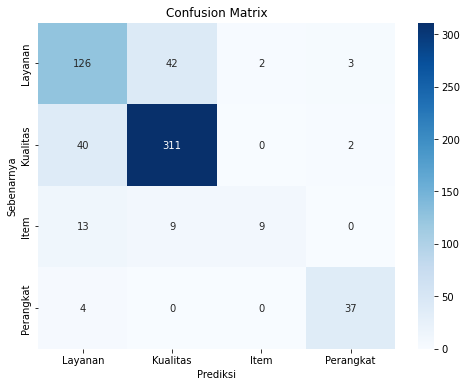

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi label untuk data uji
y_pred = np.argmax(model.predict(test_data), axis=1)

# Mengubah label yang diharapkan ke bentuk kategori
y_true = np.argmax(test_labels, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix dalam bentuk heatmap
labels = ['Layanan', 'Kualitas', 'Item', 'Campuran']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Prediksi label untuk data uji
y_pred = np.argmax(model.predict(test_data), axis=1)

# Mengubah label yang diharapkan ke bentuk kategori
y_true = np.argmax(test_labels, axis=1)

# Membuat matriks pengujian
report = classification_report(y_true, y_pred, target_names=['Layanan', 'Kualitas', 'Item', 'Perangkat'])

print(report)


19/19 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

     Layanan       0.69      0.73      0.71       173
    Kualitas       0.86      0.88      0.87       353
        Item       0.82      0.29      0.43        31
   Perangkat       0.88      0.90      0.89        41

    accuracy                           0.81       598
   macro avg       0.81      0.70      0.72       598
weighted avg       0.81      0.81      0.80       598



In [35]:
#simpan model
import pickle
filename = 'aspek_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [37]:
# Fungsi untuk memprediksi sentimen dari input teks
def predict_sentiment(text):
    # Preprocessing teks input
    input_sequence = tokenizer.texts_to_sequences([text])
    input_data = pad_sequences(input_sequence, maxlen=max_seq_length)

    # Melakukan prediksi sentimen
    sentiment_prob = model.predict(input_data)[0]
    sentiment_label = np.argmax(sentiment_prob)
    sentiment = ['Layanan', 'Kualitas', 'Item', 'Perangkat'][sentiment_label]

    # Mengembalikan hasil prediksi
    return sentiment, sentiment_prob

# Meminta input dari pengguna
input_text = input("Masukkan teks: ")

# Memprediksi sentimen dari input teks
predicted_sentiment, sentiment_probabilities = predict_sentiment(input_text)

# Menampilkan hasil prediksi
print("Hasil prediksi:")
print("Teks:", input_text)
print("Sentimen:", predicted_sentiment)
print("Probabilitas:", sentiment_probabilities)


Masukkan teks: game anjing gue sudah download habis mb main tolol
1/1 [==============================] - 0s 39ms/step
Hasil prediksi:
Teks: game anjing gue sudah download habis mb main tolol
Sentimen: Layanan
Probabilitas: [0.97838277 0.01783258 0.00263466 0.00114999]
